<a href="https://colab.research.google.com/github/gumaruw/Cryptocurrency-Data-Analysis-and-Visualization/blob/main/Cryptocurrency_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import necessary libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Get cryptocurrency data from CoinGecko API & return data in JSON format
def get_crypto_data(coin_ids):
    url = "https://api.coingecko.com/api/v3/coins/markets"
    parameters = {"vs_currency": "usd", "ids": coin_ids}
    response = requests.get(url, params=parameters)
    return response.json()

In [14]:
# Get historical data for a cryptocurrency from CoinGecko API & return data in JSON format
def get_historical_data(coin_id, days):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    parameters = {"vs_currency": "usd", "days": days}
    response = requests.get(url, params=parameters)
    return response.json()

In [15]:
# Pprocess cryptocurrency data and convert it to a pandas DataFrame
def process_crypto_data(crypto_data):
    data = []
    for coin in crypto_data:
        data.append({
            'Name': coin['name'],
            'Symbol': coin['symbol'],
            'Current Price': coin['current_price'],
            'Market Cap': coin['market_cap'],
            'Total Volume': coin['total_volume'],
            'High 24h': coin['high_24h'],
            'Low 24h': coin['low_24h']
        })
    df = pd.DataFrame(data)
    return df

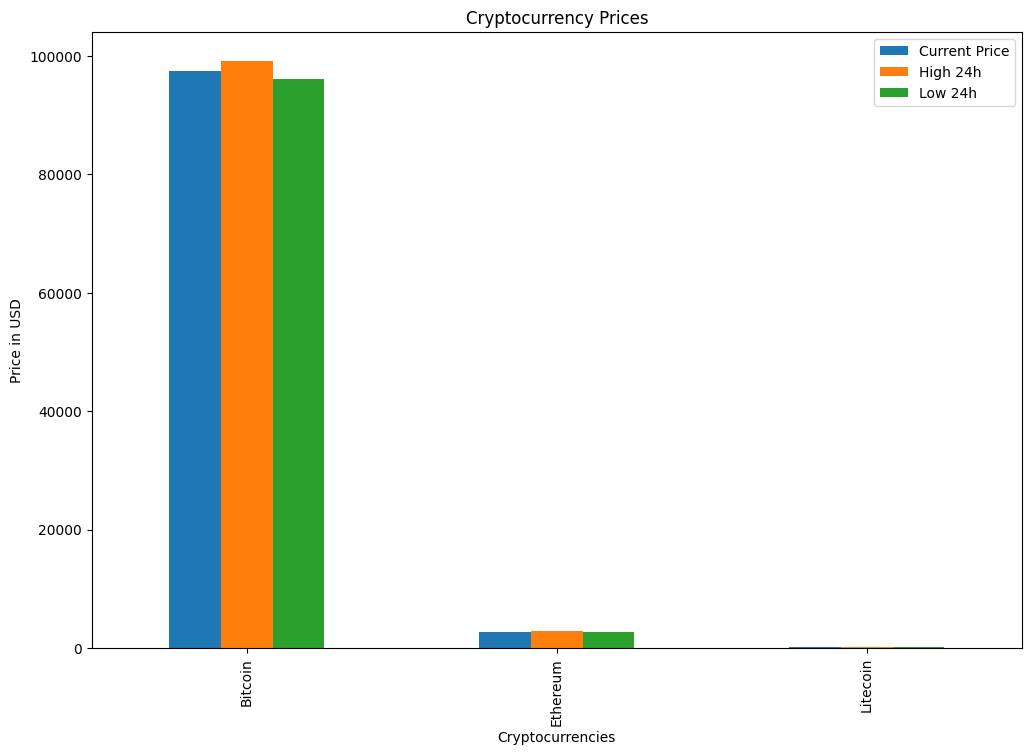

In [16]:
# Visualize cryptocurrency data
def visualize_crypto_data(df):
    df.set_index('Name')[['Current Price', 'High 24h', 'Low 24h']].plot(kind='bar', figsize=(12, 8))
    plt.title('Cryptocurrency Prices')
    plt.xlabel('Cryptocurrencies')
    plt.ylabel('Price in USD')
    plt.show()

# Example
visualize_crypto_data(crypto_df)

In [17]:
# Process historical data and convert it to a DataFrame
def process_historical_data(historical_data):
    prices = historical_data['prices']
    df = pd.DataFrame(prices, columns=['Timestamp', 'Price'])
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
    return df

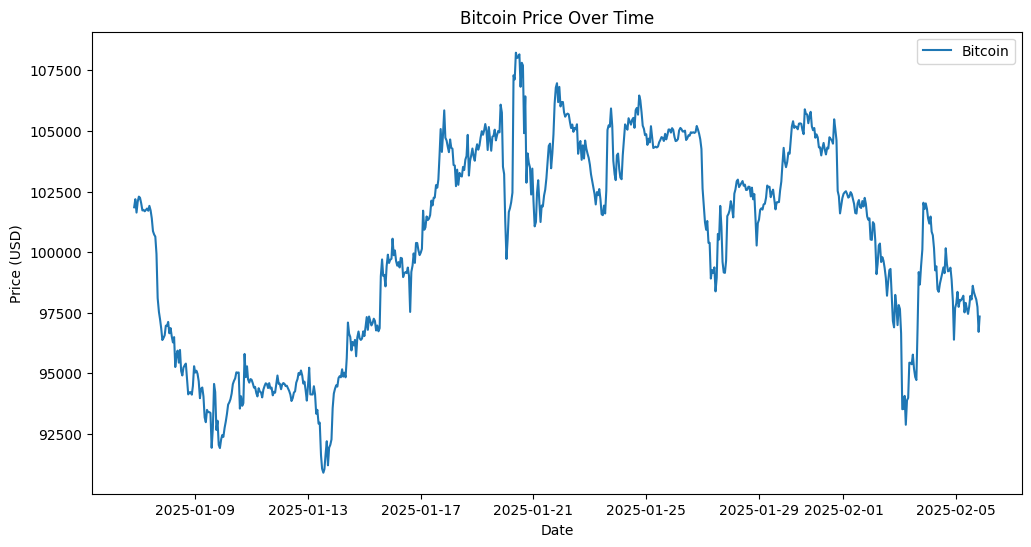

In [20]:
# Visualize historical data
def visualize_historical_data(df, coin_name):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['Price'], label=coin_name)
    plt.title(f'{coin_name} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Example
visualize_historical_data(historical_df, "Bitcoin")

In [21]:
# Calculate the value of a crypto portfolio
def calculate_portfolio_value(portfolio, current_prices):
    total_value = 0
    for coin, amount in portfolio.items():
        total_value += amount * current_prices[coin]
    return total_value

# Example
portfolio = {
    "bitcoin": 0.5,
    "ethereum": 2.0,
    "litecoin": 10.0
}

current_prices = {
    "bitcoin": 45000,
    "ethereum": 3000,
    "litecoin": 200
}

portfolio_value = calculate_portfolio_value(portfolio, current_prices)
print(f"Total Portfolio Value: ${portfolio_value}")

Total Portfolio Value: $30500.0


In [22]:
# Calculate moving averages
'''
Calculated moving averages for certain window sizes
over historical data with this function.
This was used to analyze price trends.
'''
def calculate_moving_averages(df, windows):
    for window in windows:
        df[f'MA_{window}'] = df['Price'].rolling(window=window).mean()
    return df

# Example
windows = [7, 14, 30]
historical_df = calculate_moving_averages(historical_df, windows)
print(historical_df)

                  Timestamp          Price          MA_7         MA_14  \
0   2025-01-06 20:03:51.145  101850.888743           NaN           NaN   
1   2025-01-06 21:01:53.706  102183.669137           NaN           NaN   
2   2025-01-06 22:03:59.216  101632.172664           NaN           NaN   
3   2025-01-06 23:03:54.110  102079.847212           NaN           NaN   
4   2025-01-07 00:03:51.165  102290.361685           NaN           NaN   
..                      ...            ...           ...           ...   
714 2025-02-05 16:01:49.250   98192.993469  98086.416153  98000.841111   
715 2025-02-05 17:03:47.273   98044.923292  98171.377176  98001.923012   
716 2025-02-05 18:04:04.941   97736.300861  98168.008274  97982.620977   
717 2025-02-05 19:04:09.173   96709.736297  97956.067311  97883.692329   
718 2025-02-05 19:55:12.000   97342.164984  97855.550618  97822.367221   

            MA_30  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4          

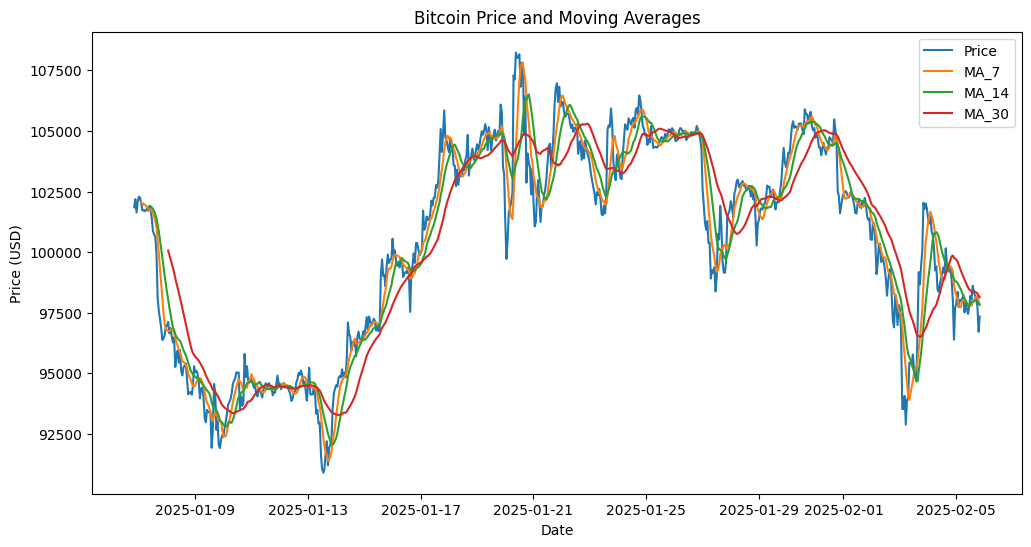

In [10]:
# Visualize moving averages
def visualize_moving_averages(df, coin_name):
    """
    Visualizes moving averages using a line chart.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['Price'], label='Price')
    for window in windows:
        plt.plot(df['Timestamp'], df[f'MA_{window}'], label=f'MA_{window}')
    plt.title(f'{coin_name} Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Example
visualize_moving_averages(historical_df, "Bitcoin")

In [27]:
# clean and transform cryptocurrency data
def clean_transform_data(df):
    df.dropna(inplace=True)
    df['Current Price'] = df['Current Price'].apply(lambda x: round(x, 2))
    return df

In [39]:
# calculate Bollinger Bands
def calculate_bollinger_bands(df, window):
  """
  Calculated Bollinger Bands with this function.
  This was used to analyze how the price moved between the upper and lower bands.
  """
  df['MA'] = df['Price'].rolling(window=window).mean()
  df['STD'] = df['Price'].rolling(window=window).std()
  df['Upper Band'] = df['MA'] + (df['STD'] * 2)
  df['Lower Band'] = df['MA'] - (df['STD'] * 2)
  return df

In [35]:
# calculate correlation between cryptocurrencies
def calculate_correlation(df):
    '''
    This analyzed relationships between data using only numerical columns.
    '''
    numeric_df = df.drop(columns=['Name', 'Symbol'])
    correlation_matrix = numeric_df.corr()
    return correlation_matrix

In [30]:
# get cryptocurrency data with error handling
'''
Added error management and retry mechanism in API requests with this function.
This retries if API requests fail.
'''
def get_crypto_data_with_retry(coin_ids, retries=3):
    url = "https://api.coingecko.com/api/v3/coins/markets"
    parameters = {"vs_currency": "usd", "ids": coin_ids}
    for attempt in range(retries):
        try:
            response = requests.get(url, params=parameters)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt == retries - 1:
                raise

In [31]:
# save DataFrame to CSV file
def save_to_csv(df, filename):
    df.to_csv(filename, index=False)

# send notification (example using print, can be replaced with email/SMS)
def send_notification(message):
    print(f"Notification: {message}")

       Name Symbol  Current Price     Market Cap  Total Volume  High 24h  \
0   Bitcoin    btc       97519.00  1929917450504   54615467632  99019.00   
1  Ethereum    eth        2778.78   334633044826   38623524637   2824.26   
2  Litecoin    ltc         105.87     7991812747     894389166    108.19   

    Low 24h  
0  96026.00  
1   2633.94  
2     98.76  


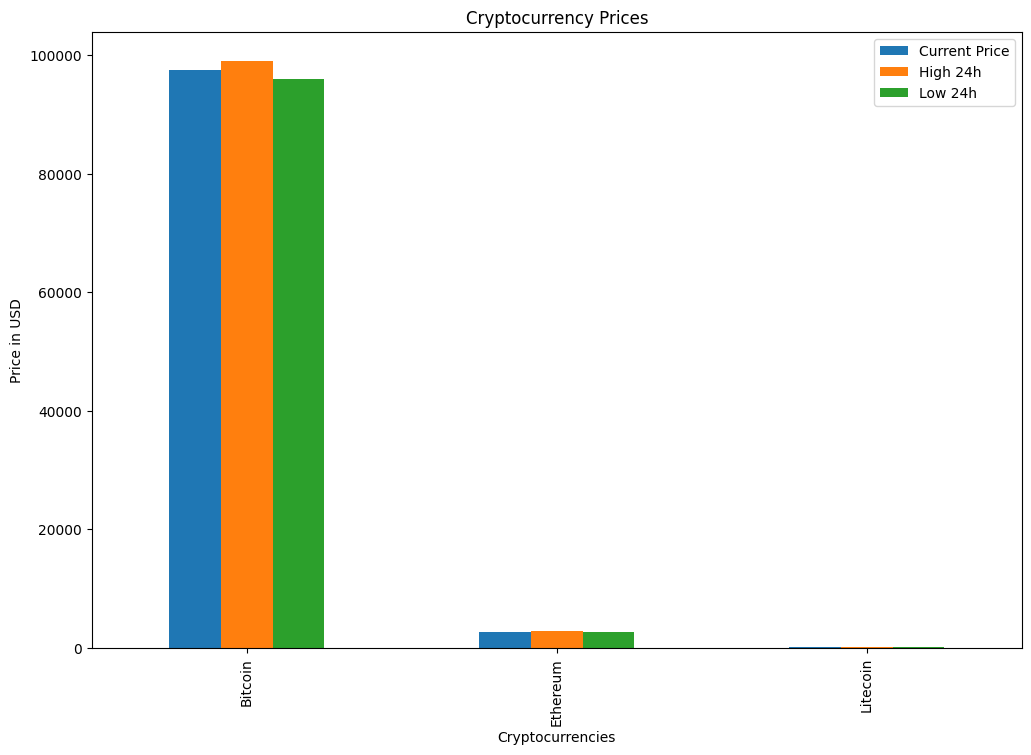

                  Timestamp          Price
0   2025-01-06 21:01:53.706  102183.669137
1   2025-01-06 22:03:59.216  101632.172664
2   2025-01-06 23:03:54.110  102079.847212
3   2025-01-07 00:03:51.165  102290.361685
4   2025-01-07 01:01:39.780  102245.050135
..                      ...            ...
714 2025-02-05 17:03:47.273   98044.923292
715 2025-02-05 18:04:04.941   97736.300861
716 2025-02-05 19:04:09.173   96709.736297
717 2025-02-05 20:02:38.875   97377.747297
718 2025-02-05 20:11:14.000   97690.526458

[719 rows x 2 columns]


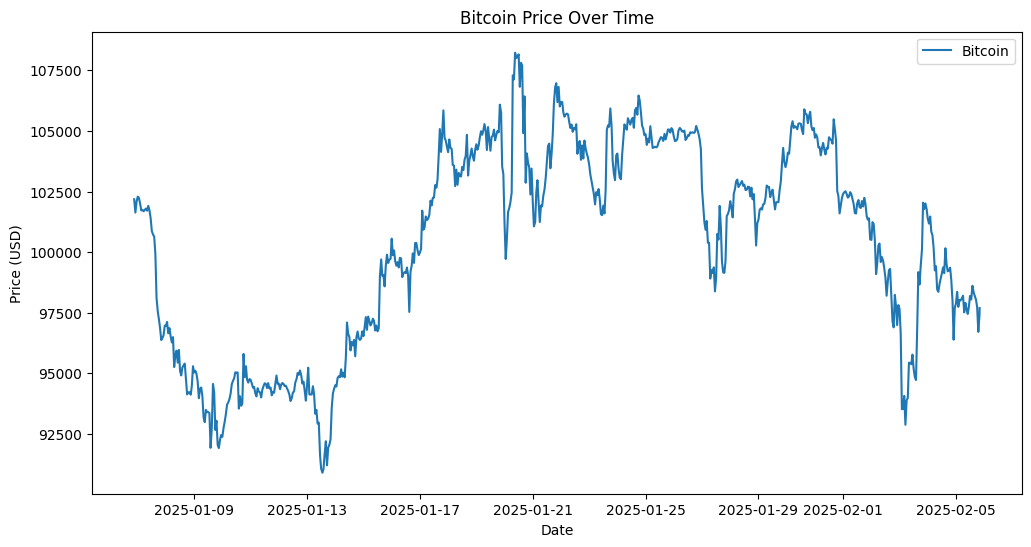

Total Portfolio Value: $30500.0
                  Timestamp          Price          MA_7         MA_14  \
0   2025-01-06 21:01:53.706  102183.669137           NaN           NaN   
1   2025-01-06 22:03:59.216  101632.172664           NaN           NaN   
2   2025-01-06 23:03:54.110  102079.847212           NaN           NaN   
3   2025-01-07 00:03:51.165  102290.361685           NaN           NaN   
4   2025-01-07 01:01:39.780  102245.050135           NaN           NaN   
..                      ...            ...           ...           ...   
714 2025-02-05 17:03:47.273   98044.923292  98171.377176  98001.923012   
715 2025-02-05 18:04:04.941   97736.300861  98168.008274  97982.620977   
716 2025-02-05 19:04:09.173   96709.736297  97956.067311  97883.692329   
717 2025-02-05 20:02:38.875   97377.747297  97860.633806  97824.908815   
718 2025-02-05 20:11:14.000   97690.526458  97729.070908  97837.523362   

            MA_30  
0             NaN  
1             NaN  
2             NaN  

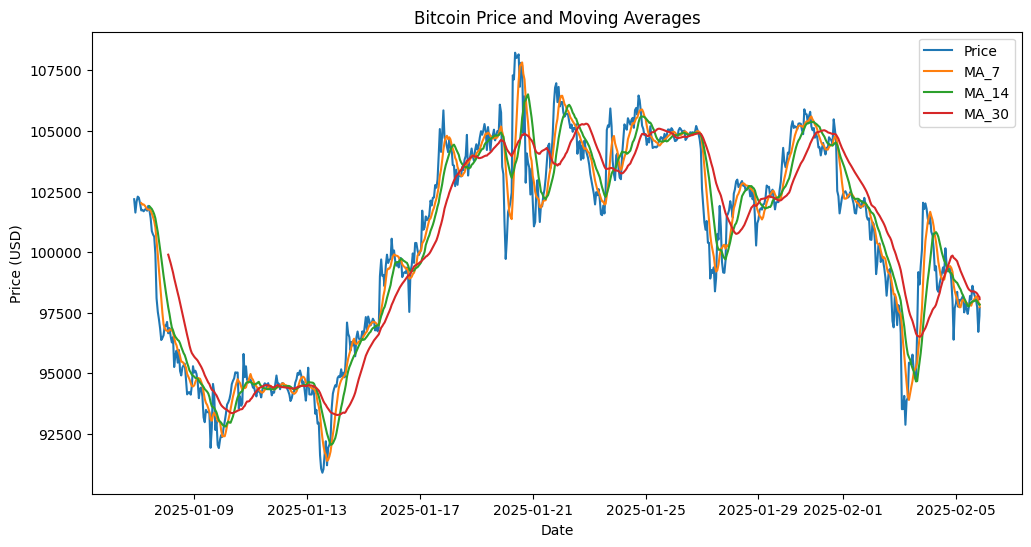

                  Timestamp          Price    Upper Band    Lower Band
0   2025-01-06 21:01:53.706  102183.669137           NaN           NaN
1   2025-01-06 22:03:59.216  101632.172664           NaN           NaN
2   2025-01-06 23:03:54.110  102079.847212           NaN           NaN
3   2025-01-07 00:03:51.165  102290.361685           NaN           NaN
4   2025-01-07 01:01:39.780  102245.050135           NaN           NaN
..                      ...            ...           ...           ...
714 2025-02-05 17:03:47.273   98044.923292  98833.225063  96979.276470
715 2025-02-05 18:04:04.941   97736.300861  98573.700497  97373.779690
716 2025-02-05 19:04:09.173   96709.736297  98742.808765  97106.583313
717 2025-02-05 20:02:38.875   97377.747297  98753.138365  97045.197711
718 2025-02-05 20:11:14.000   97690.526458  98695.685505  97035.662693

[719 rows x 4 columns]
               Current Price  Market Cap  Total Volume  High 24h   Low 24h
Current Price       1.000000    0.990847      0.7

In [37]:
# Example usage
if __name__ == '__main__':
    # Step 1: Get and process current cryptocurrency data
    coin_ids = "bitcoin,ethereum,litecoin"
    crypto_data = get_crypto_data_with_retry(coin_ids)
    crypto_df = process_crypto_data(crypto_data)
    crypto_df = clean_transform_data(crypto_df)
    print(crypto_df)
    visualize_crypto_data(crypto_df)

    # Step 2: Get and process historical data for Bitcoin
    coin_id = "bitcoin"
    days = 30
    historical_data = get_historical_data(coin_id, days)
    historical_df = process_historical_data(historical_data)
    print(historical_df)
    visualize_historical_data(historical_df, "Bitcoin")

    # Step 3: Calculate and print portfolio value
    portfolio = {"bitcoin": 0.5, "ethereum": 2.0, "litecoin": 10.0}
    current_prices = {"bitcoin": 45000, "ethereum": 3000, "litecoin": 200}
    portfolio_value = calculate_portfolio_value(portfolio, current_prices)
    print(f"Total Portfolio Value: ${portfolio_value}")

    # Step 4: Calculate and visualize moving averages
    windows = [7, 14, 30]
    historical_df = calculate_moving_averages(historical_df, windows)
    print(historical_df)
    visualize_moving_averages(historical_df, "Bitcoin")

    # Step 5: Calculate and print Bollinger Bands
    historical_df = calculate_bollinger_bands(historical_df, 20)
    print(historical_df[['Timestamp', 'Price', 'Upper Band', 'Lower Band']])

    # Step 6: Calculate and print correlation matrix
    correlation_matrix = calculate_correlation(crypto_df)
    print(correlation_matrix)

    # Step 7: Save current cryptocurrency data to CSV
    save_to_csv(crypto_df, "crypto_data.csv")

    # Step 8: Send notification if Bitcoin price crosses a threshold
    threshold = 50000
    if current_prices["bitcoin"] > threshold:
        send_notification(f"Bitcoin price has crossed ${threshold}!")